In [1]:
import numpy as np

import fitsio as ft
from glob import glob
import healpy as hp
import corner

import sys
sys.path.append('/users/PHS0336/medirz90/github/LSSutils')
sys.path.append('/users/PHS0336/medirz90/github/sysnetdev')
import sysnet.sources as src

from lssutils.dataviz import mollview, setup_color, mycolor, add_locators
from lssutils.utils import make_hp, histogram_cell
from lssutils.theory.cell import bias_model_lrg, dNdz_model, init_sample, SurveySpectrum, Spectrum
from lssutils.stats.window import WindowSHT
from lssutils.io import read_chain
from lssutils.stats.pcc import pcc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
%matplotlib inline

In [3]:
setup_color()

In [4]:
def dndz(z, p):
    return (p[0]*z**2+p[3]*z**4)*np.exp(-p[1]*z-p[2]*z**3)

In [5]:
z = np.linspace(0.0, 2.0, num=1000)
dn = dndz(z, [59.45242328, -2.06813866,  3.33030468, 85.11171489,  0.])
bz = 1.42790208e+00*bias_model_lrg(z)

In [6]:
dt = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')
w = np.zeros(12*256*256)
w[dt['hpix']] = 1.0
weight = hp.ud_grade(w, 1024)
mask = weight > 0.5

In [7]:
el = np.arange(2000)

model = SurveySpectrum()
model.add_tracer(z, bz, dn)
model.add_kernels(el)
model.add_window(weight, mask, np.arange(2000), ngauss=2000)

h         : 0.67556
T0_cmb    : 2.7255
Omega0_b  : 0.0482754208891869
Omega0_cdm: 0.26377065934278865
N_ur      : None
m_ncdm    : [0.06]
P_k_max   : 10.0
P_z_max   : 100.0
sigma8    : 0.8225
gauge     : synchronous
n_s       : 0.9667
nonlinear : False
p = 1.6


/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:263: RuntimeWarning: divide by zero encountered in true_divide
  fnl_f = self.alpha_fnl/(k2*self.Tlin(k))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:264: RuntimeWarning: invalid value encountered in multiply
  w_f1 = self.wfnlk1[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:265: RuntimeWarning: invalid value encountered in multiply
  w_f2 = self.wfnlk2[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:272: RuntimeWarning: invalid value encountered in multiply
  i_f1f1.append(self.simps(k3pk*w_f1*w_f1, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:273: RuntimeWarning: invalid value encountered in multiply
  i_f2f2.append(self.simps(k3pk*w_f2*w_f2, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:275: RuntimeWarning: invalid value encountered in multiply
  i_gf1.append(self.simps(k3pk*w_g*w_f1, lnk))
/use

In [1]:
for fnl in np.linspace(-60, 60, num=5):
    ln, = plt.plot(el, model(el, fnl=fnl), ls='-')
#     plt.plot(el, model2(el, fnl=fnl), ls='--', color=ln.get_color())  

plt.loglog()

NameError: name 'np' is not defined

<ipython-input-46-9583d9181a93>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(r, model.fr_wk(r)/model2.fr_wk(r))


[]

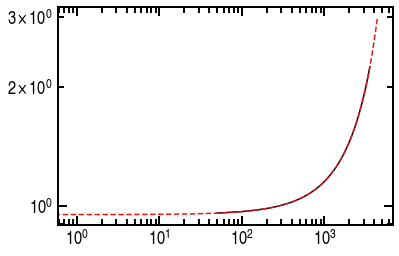

In [46]:
r = np.linspace(0, 1.0e6, 20000)
z = np.linspace(0, 3, 10000)

plt.plot(r, model.fr_wk(r)/model2.fr_wk(r))
plt.plot(model.Dc(z), 1.42790208/1.5*bias_model_lrg(z))
plt.loglog()

In [45]:
model(el, fnl=100)/model2(el, fnl=100)

array([25.93572383, 54.21641149, 24.75488634, ...,  1.99174528,
        1.99174945,  1.99175362])

In [114]:
model2 = SurveySpectrum()
model2.add_tracer(*init_sample('lrg'))
model2.add_kernels(el)
model2.add_window(weight, mask, np.arange(2048), ngauss=2048)

h         : 0.67556
T0_cmb    : 2.7255
Omega0_b  : 0.0482754208891869
Omega0_cdm: 0.26377065934278865
N_ur      : None
m_ncdm    : [0.06]
P_k_max   : 10.0
P_z_max   : 100.0
sigma8    : 0.8225
gauge     : synchronous
n_s       : 0.9667
nonlinear : False
p = 1.6


/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:263: RuntimeWarning: divide by zero encountered in true_divide
  fnl_f = self.alpha_fnl/(k2*self.Tlin(k))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:264: RuntimeWarning: invalid value encountered in multiply
  w_f1 = self.wfnlk1[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:275: RuntimeWarning: invalid value encountered in multiply
  i_gf1.append(self.simps(k3pk*w_g*w_f1, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:276: RuntimeWarning: invalid value encountered in multiply
  i_gf2.append(self.simps(k3pk*w_g*w_f2, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:265: RuntimeWarning: invalid value encountered in multiply
  w_f2 = self.wfnlk2[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:272: RuntimeWarning: invalid value encountered in multiply
  i_f1f1.append(self.simps(k3pk*w_f1*w_f1, lnk))
/users

In [ ]:
fg, ax = plt.subplots()

for i, fnl in enumerate(np.linspace(-200, 200, num=10)):
    
    #
    ax.plot(el, el*model(el, fnl=fnl, noise=5.21153348e-07), 
             color=plt.cm.jet(i/10), label='%.1f'%fnl)
    
    #ax.plot(el, model2(el, fnl=fnl, b=1.42790208e+00, noise=5.21153348e-07),
    #          color=plt.cm.jet(i/10), )    
# ax.loglog()
# ax.loglog()
ax.legend(bbox_to_anchor=(1.3, 1.1))

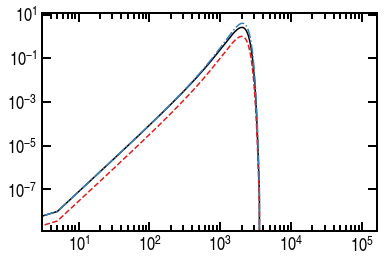

In [21]:
r = np.linspace(0, 1.e5, num=20000)
plt.plot(r, model.fr_wk(r))
plt.plot(r, model.fr_wrk(r))
plt.plot(r, model.fr_wkfnl1(r))
plt.xscale('log')
plt.yscale('log')
# plt.ylim(1.0e-10, 10)
# plt.xlim(100, 4000)

## Spectrum

In [4]:
bm = np.load('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50.npz')

zbdndz = init_sample(kind='lrg')

# read survey geometry
dt = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')
w = np.zeros(12*256*256)
w[dt['hpix']] = 1.0
weight = hp.ud_grade(w, 1024)
mask = weight > 0.5

model = Spectrum()
model.add_tracer(*zbdndz, p=1.6)
model.add_kernels(np.arange(2000))

wind = WindowSHT(weight, mask, np.arange(2048), ngauss=2048)


fnl, b, noise = bm['best_fit']
el_g = np.arange(2000)
cl_bf = model(el_g, fnl=fnl, b=b, noise=noise)
        
cl_bfw = wind.convolve(el_g, cl_bf)
lmax = max(el_g)+1
cl_bfwic = wind.apply_ic(cl_bfw[:lmax])

cl_ = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean_fine.npz')
el_edges = cl_['el_edges']
el = cl_['el_bin']
cl = cl_['cl']

cl_models = {}
for name, cl_i in zip(['Best Fit Model', '+ Window Convolution', '+ Integral Constraint'],
                      [cl_bf, cl_bfw[:2000], cl_bfwic[:2000]]):
    
    cl_models[name] = histogram_cell(el_g, cl_i, bins=el_edges)

h         : 0.67556
T0_cmb    : 2.7255
Omega0_b  : 0.0482754208891869
Omega0_cdm: 0.26377065934278865
N_ur      : None
m_ncdm    : [0.06]
P_k_max   : 10.0
P_z_max   : 100.0
sigma8    : 0.8225
gauge     : synchronous
n_s       : 0.9667
nonlinear : False
p = 1.6


/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:263: RuntimeWarning: divide by zero encountered in true_divide
  fnl_f = self.alpha_fnl/(k2*self.Tlin(k))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:264: RuntimeWarning: invalid value encountered in multiply
  w_f1 = self.wfnlk1[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:275: RuntimeWarning: invalid value encountered in multiply
  i_gf1.append(self.simps(k3pk*w_g*w_f1, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:276: RuntimeWarning: invalid value encountered in multiply
  i_gf2.append(self.simps(k3pk*w_g*w_f2, lnk))
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:265: RuntimeWarning: invalid value encountered in multiply
  w_f2 = self.wfnlk2[i][1]*fnl_f
/users/PHS0336/medirz90/github/LSSutils/lssutils/theory/cell.py:272: RuntimeWarning: invalid value encountered in multiply
  i_f1f1.append(self.simps(k3pk*w_f1*w_f1, lnk))
/users

'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


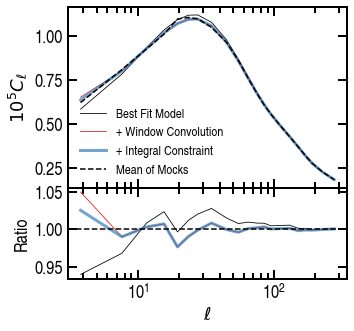

In [5]:
fig = plt.figure(figsize=(5, 5), constrained_layout=False)
gs = GridSpec(3, 1, figure=fig)

ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2, 0])

f = 1.0e5
lw = [0.8, 0.8, 3.]
ls = ['-', '-', '-']
al = [1., 1., 0.7]
for i, (n, v) in enumerate(cl_models.items()):
    kw = dict(label=n, lw=lw[i], ls=ls[i], alpha=al[i])
    ax1.plot(v[0], f*v[1], **kw)
    ax2.plot(el, v[1]/cl, **kw)
    
ax1.plot(el, f*cl, 'C0--', label='Mean of Mocks')
ax2.axhline(1.0, color='C0', ls='--')


ax1.legend(ncol=1)
ax1.set(xscale='log', ylabel=r'$10^{5}C_{\ell}$')
ax1.tick_params(labelbottom=False)
ax2.set(xscale='log', xlabel=r'$\ell$', ylabel='Ratio')
ax2.set_xlim(ax1.get_xlim())

fig.subplots_adjust(hspace=0.0, wspace=0.02)
fig.align_labels()

fig.savefig('model_window.pdf', bbox_inches='tight')

## Mean Density

/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits
/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_ndecals_256.fits
/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_sdecals_256.fits


'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


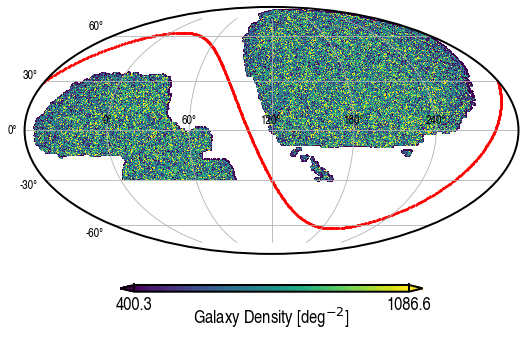

In [6]:
d = []
for fl in glob('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_*_256.fits'):
    print(fl)
    d.append(ft.read(fl))
    

ng = np.zeros(12*256*256)
cn = np.zeros(12*256*256)
fr = np.zeros(12*256*256)

for di in d:
    ng_ = make_hp(256, di['hpix'], di['label'])
    cn_ = make_hp(256, di['hpix'], 1.0)
    fr_ = make_hp(256, di['hpix'], di['fracgood'])
    
    ng += ng_
    cn += cn_
    fr += fr_
    
is_bad = cn == 0.0
ng[~is_bad] = (ng[~is_bad]/(cn[~is_bad]*hp.nside2pixarea(256, degrees=True)))
fr[~is_bad] = fr[~is_bad]/cn[~is_bad]
ng[is_bad] = np.nan
fr[is_bad] = np.nan    


vmin, vmax = np.percentile(ng[~is_bad], [5, 95])

mollview(ng, vmin, vmax, r'Galaxy Density [deg$^{-2}$]', 
             cmap='viridis', colorbar=True, galaxy=True)
plt.savefig('nlrg.pdf', bbox_inches='tight')

## Redshift Distribution

'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


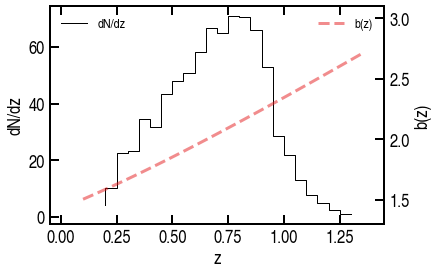

In [9]:
nz = np.loadtxt('/fs/ess/PHS0336/data/rongpu/sv3_lrg_dndz_denali.txt')

fg, ax = plt.subplots()

ax.step(nz[:, 0], nz[:, 2], where='pre', lw=1, label='dN/dz')
ax.set(xlim=(-0.05, 1.45), xlabel='z', ylabel='dN/dz')

ax1 = ax.twinx()
z_g = np.linspace(0.1, 1.35)

ax1.plot(z_g, 1.4262343145500318*bias_model_lrg(z_g), 'C1--', lw=3, alpha=0.5, zorder=10, label='b(z)')
ax1.set_ylabel('b(z)')
ax1.set_ylim((1.3, 3.1))

ax1.legend(loc='upper right')
ax.legend(loc='upper left')
fg.savefig('nz_lrg.pdf', bbox_inches='tight')

## Mock Spectra

1000


'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


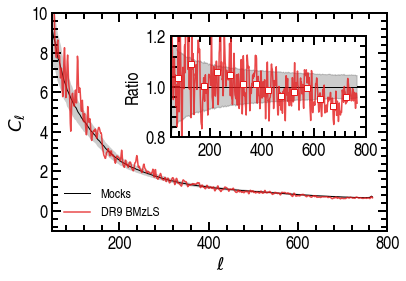

In [10]:
# dr9
cl_obs = np.load('/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v3/cl_lrg_bmzls_256_noweight.npy', allow_pickle=True).item()

# mocks
cls = []
clmocks = glob('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_*_lrg_bmzls_256_noweight.npy')
print(len(clmocks))
for cl_ in clmocks:    
    d_ = np.load(cl_, allow_pickle=True).item()['cl_gg']['cl']
    cls.append(d_)
    
    

f = 1.0e6

fg, ax = plt.subplots()

el = np.arange(cls[0].size)
clm = np.mean(cls, axis=0)
std = np.std(cls, axis=0)
vmin = clm-std
vmax = clm+std

elb, clb = histogram_cell(el, cl_obs['cl_gg']['cl']/clm, bins=np.arange(50., 800., 50.))


ax.plot(f*clm, lw=1, label='Mocks')
ax.fill_between(el, f*vmin, f*vmax, alpha=0.2)
ax.plot(f*cl_obs['cl_gg']['cl'], ls='-', label='DR9 BMzLS', alpha=0.8)
ax.set(xlim=(50, 800), ylim=(-1.0, 10.), xlabel=r'$\ell$', ylabel=r'$C_{\ell}$')
add_locators(ax, 200, 2)
ax.legend(loc='lower left')

ax1 = fg.add_axes([0.4, 0.45, 0.45, 0.35])
ax1.plot(cl_obs['cl_gg']['cl']/clm, ms=2, ls='-', alpha=0.8, color='C1')
ax1.plot(elb, clb, marker='s', mfc='w', color='C1',  ls='none')
ax1.fill_between(el, vmin/clm, vmax/clm, color='C0', alpha=0.2)
ax1.axhline(1., zorder=-10, lw=1)


ax1.set(xlim=(50, 800), ylim=(0.8, 1.2), ylabel='Ratio')

add_locators(ax1, 200, 0.2)

fg.savefig('clmocks.pdf', bbox_inches='tight')

## Best Fit Full Sky

In [12]:
params = {}

for r in ['fullsky', 'bmzls']:
    bf = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/bestfit_{r}_noweight_fine.npz')

    assert np.all(bf['success'])
    p = bf['params']
    p[:, 2] *= 1.0e7
    
    params[r] = p

'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


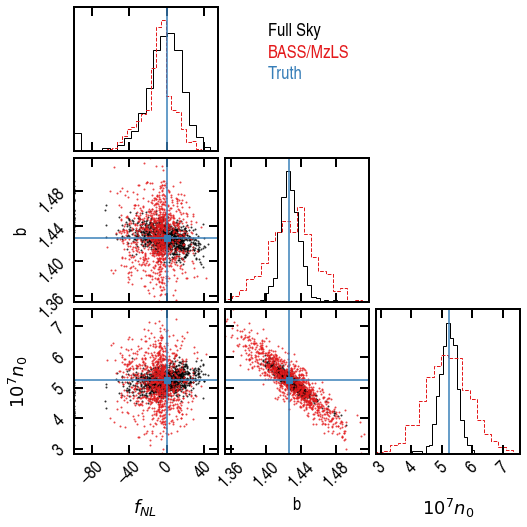

In [13]:
fg = corner.corner(params['fullsky'], labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], truths=[0.0, 1.426, 5.24], truth_color='C2',
              **dict(fill_contours=False, plot_density=False, plot_contours=False, data_kwargs={'alpha':0.8}))
corner.corner(params['bmzls'], labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], fig=fg, color='C1',
              **dict(fill_contours=False, plot_density=False, plot_contours=False, data_kwargs={'alpha':0.8}))
fg.align_labels()

ax = fg.get_axes()
ax[1].text(0.3, 0.8, 'Full Sky', color='C0', transform=ax[1].transAxes)
ax[1].text(0.3, 0.65, 'BASS/MzLS', color='C1', transform=ax[1].transAxes)
ax[1].text(0.3, 0.5, 'Truth', color='C2', transform=ax[1].transAxes)
fg.savefig('bestfit_mocks.pdf', bbox_inches='tight')
fg.show()

In [14]:
for n, p in params.items():
    print(n, p.mean(axis=0), p.std(axis=0))

fullsky [-4.01801113  1.42758953  5.2168885 ] [2.35751695e+01 1.21548077e-02 2.90613615e-01]
bmzls [-9.24939634  1.42899726  5.18653758] [16.87808622  0.02767322  0.7346823 ]


In [15]:
params['fullsky'].std(axis=0)/params['bmzls'].std(axis=0), np.sqrt(0.13)

(array([1.39679163, 0.43922636, 0.39556365]), 0.36055512754639896)

## MCMC

'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


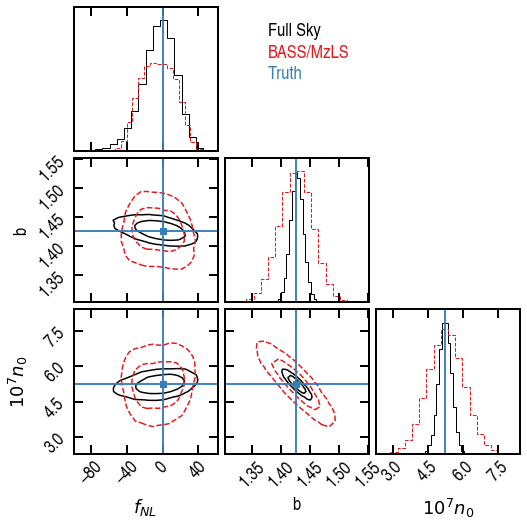

In [16]:
bm = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50.npz')[1]
fs = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_steps10000_walkers50.npz')[1]

kw = dict(plot_datapoints=False, truths=[0.0, 1.426, 5.24], truth_color='C2',
          labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(fs, color='C0', **kw)
corner.corner(bm, fig=fig, color='C1', contour_kwargs=dict(linestyles='--'), **kw)
ax = fig.get_axes()

ax[1].text(0.3, 0.8, 'Full Sky', color='C0', transform=ax[1].transAxes)
ax[1].text(0.3, 0.65, 'BASS/MzLS', color='C1', transform=ax[1].transAxes)
ax[1].text(0.3, 0.5, 'Truth', color='C2', transform=ax[1].transAxes)

fig.savefig('mcmc_mocks.pdf', bbox_inches='tight')

In [17]:
stats = {}
stats['BASS/MzLS'] = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50.npz')[0]
stats['Full Sky'] = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_steps10000_walkers50.npz')[0]

In [20]:
pstats = pd.DataFrame(stats,
                      index=['MAP [scipy]', 'MAP [chain]', 'Mean [chain]',
                             'Median [chain]', '16th', '84th']).T
pstats

,MAP [scipy],MAP [chain],Mean [chain],Median [chain],16th,84th
BASS/MzLS,-3.489581,-3.474544,-5.104015,-5.158841,-24.978014,14.800809
Full Sky,-0.102513,-0.341994,-4.709317,-3.294020,-22.975758,13.868576


In [19]:
import pandas as pd

## Feature Elimination

In [5]:
%matplotlib inline

In [3]:
model = src.LinearRegression(add_bias=True)

In [19]:
fr = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')['features']

In [5]:
maps_dr9 = ['ebv', 'nstar']\
            + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
            + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
            + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

In [8]:
%matplotlib inline

In [27]:
ccf = np.corrcoef(fr, rowvar=False)
ccf.max(), ccf.min()

(1.0, -0.5124436766967613)

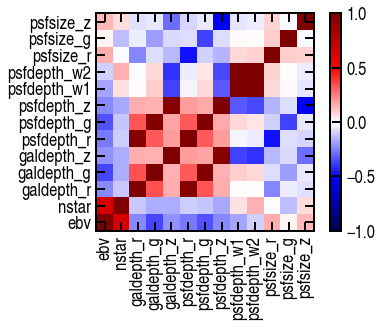

In [28]:
fg, ax = plt.subplots()

mp = ax.imshow(ccf, cmap='seismic', origin='lower', vmin=-1.0, vmax=1.0)
fg.colorbar(mp)

ax.set_xticks(np.arange(len(maps_dr9)))
ax.set_xticklabels(maps_dr9, rotation=90)
ax.set_yticks(np.arange(len(maps_dr9)))
_ = ax.set_yticklabels(maps_dr9)

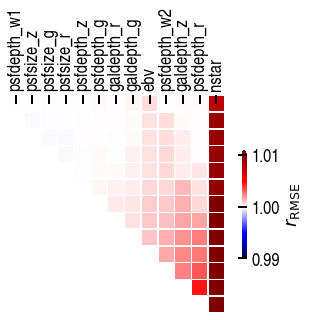

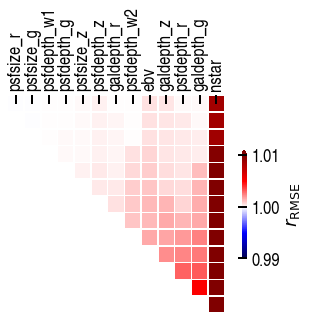

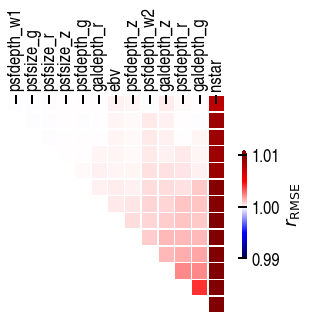

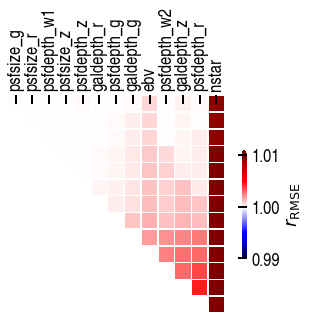

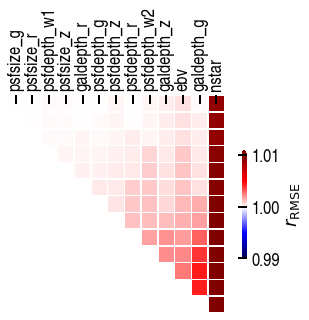

In [32]:
dl = src.MyDataLoader('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits', 
                      do_kfold=True, seed=85)

for i in range(5):
    
    fs = src.FeatureElimination(model, dl.load_data(-1, i))
    fs.run([j for j in range(13)])

    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)

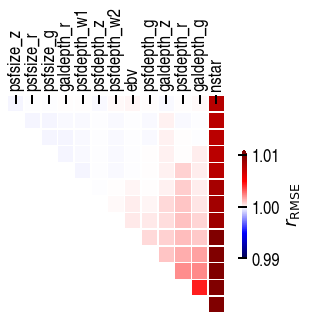

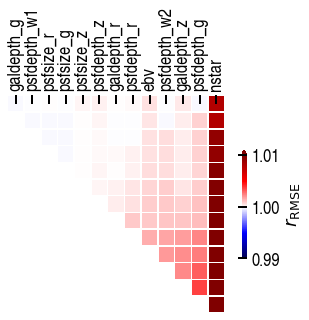

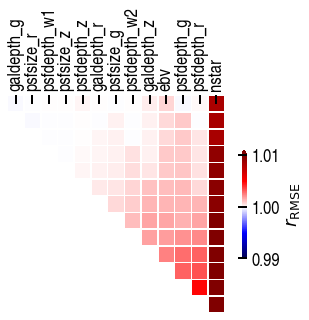

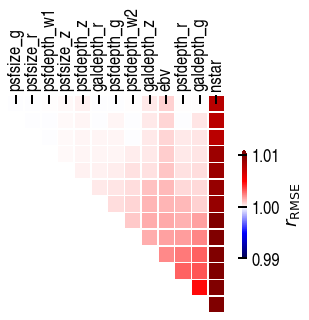

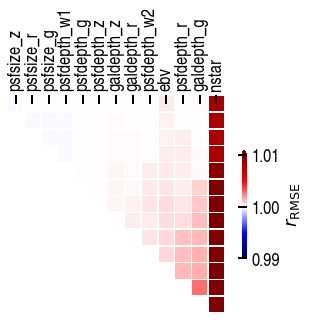

In [33]:
dl = src.MyDataLoader('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits', 
                      do_kfold=True, seed=4200)

for i in range(5):
    
    fs = src.FeatureElimination(model, dl.load_data(-1, i))
    fs.run([j for j in range(13)])

    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)

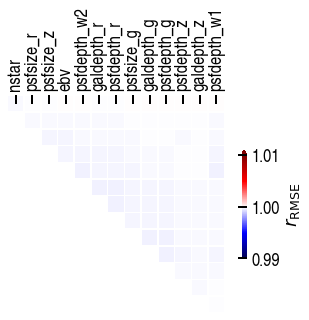

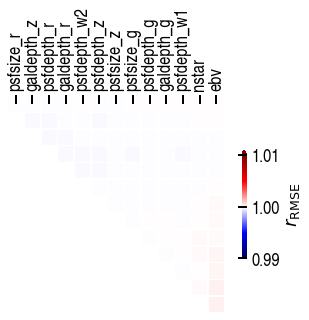

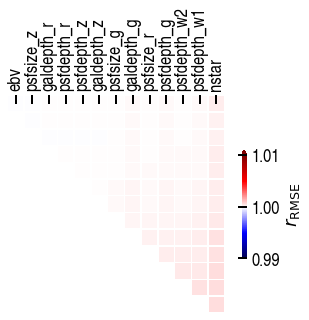

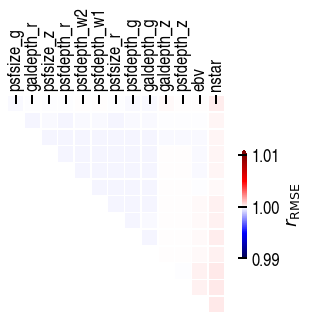

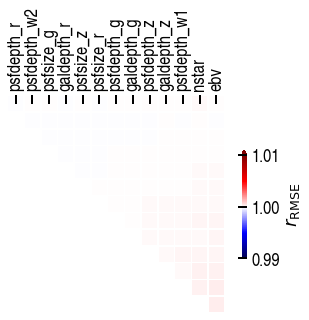

In [34]:
## mock
dl = src.MyDataLoader('/fs/ess/PHS0336/data/lognormal/v0/tables/bmzls/nlrg-1-bmzls.fits', 
                      do_kfold=True, seed=85)

for i in range(5):
    
    fs = src.FeatureElimination(model, dl.load_data(-1, i))
    fs.run([j for j in range(13)])

    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)

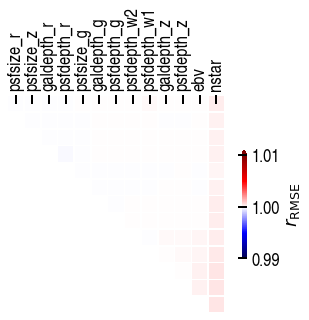

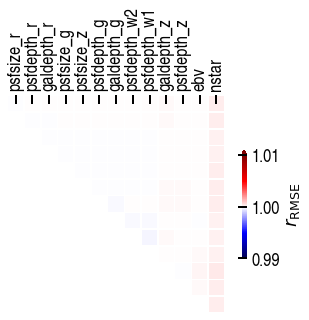

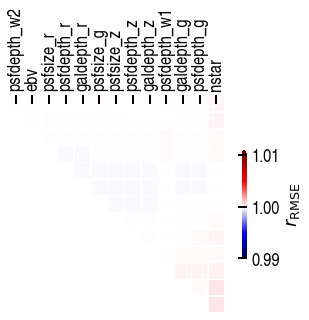

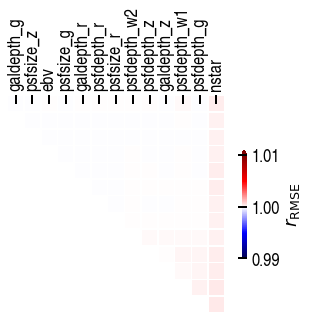

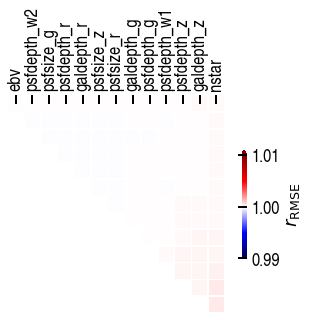

In [35]:
## mock
dl = src.MyDataLoader('/fs/ess/PHS0336/data/lognormal/v0/tables/bmzls/nlrg-1-bmzls.fits', 
                      do_kfold=True, seed=4200)

for i in range(5):
    
    fs = src.FeatureElimination(model, dl.load_data(-1, i))
    fs.run([j for j in range(13)])

    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)

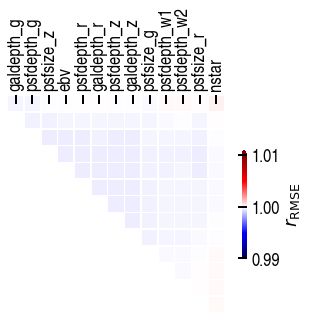

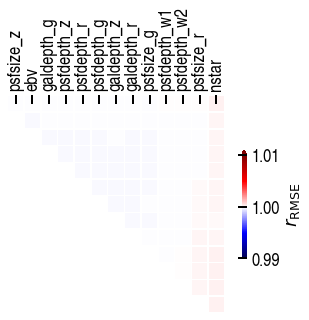

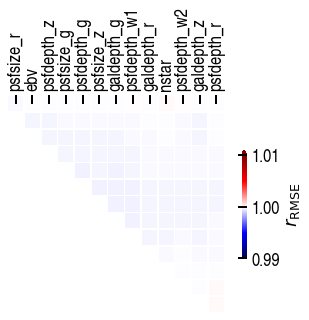

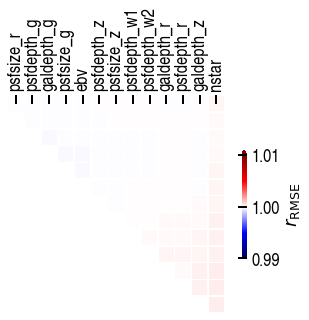

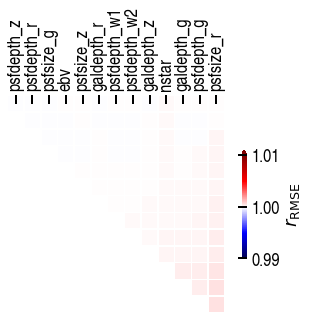

In [36]:
## mock
dl = src.MyDataLoader('/fs/ess/PHS0336/data/lognormal/v0/tables/bmzls/nlrg-10-bmzls.fits', 
                      do_kfold=True, seed=4200)

for i in range(5):
    
    fs = src.FeatureElimination(model, dl.load_data(-1, i))
    fs.run([j for j in range(13)])

    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)

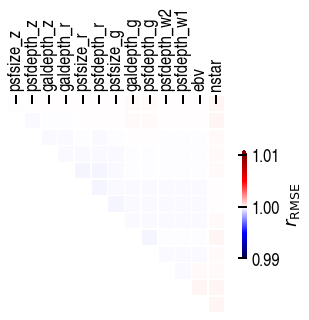

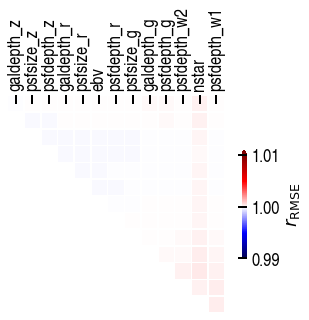

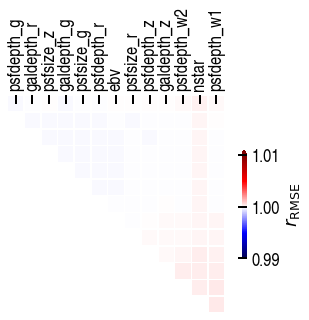

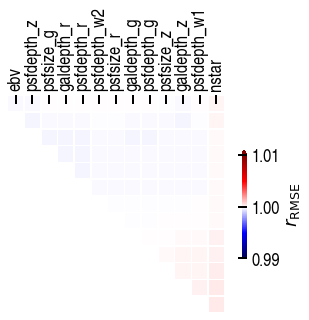

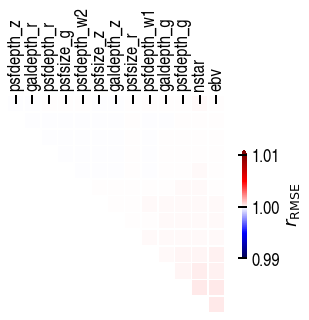

In [37]:
## mock
dl = src.MyDataLoader('/fs/ess/PHS0336/data/lognormal/v0/tables/bmzls/nlrg-1-bmzls.fits', 
                      do_kfold=True, seed=15)

for i in range(5):
    
    fs = src.FeatureElimination(model, dl.load_data(-1, i))
    fs.run([j for j in range(13)])

    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)

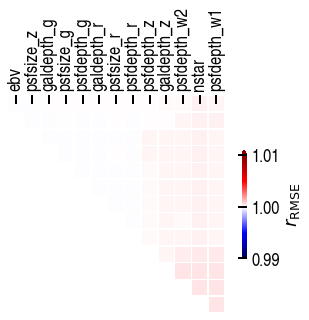

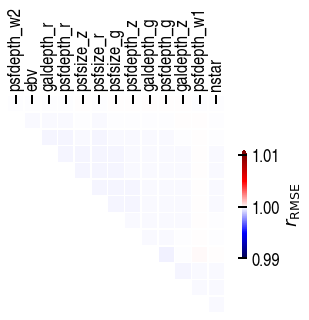

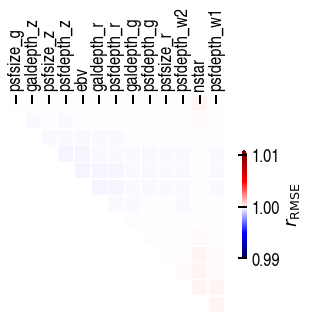

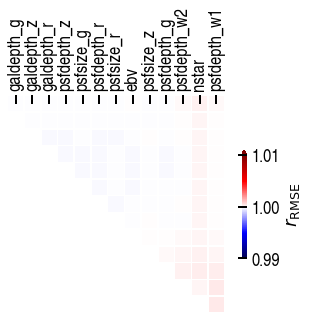

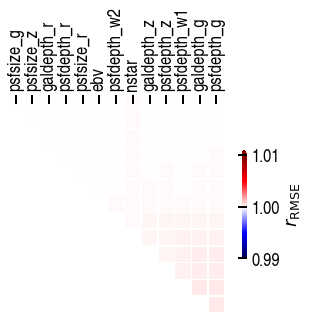

In [38]:
## mock
dl = src.MyDataLoader('/fs/ess/PHS0336/data/lognormal/v0/tables/bmzls/nlrg-1-bmzls.fits', 
                      do_kfold=True, seed=113)

for i in range(5):
    
    fs = src.FeatureElimination(model, dl.load_data(-1, i))
    fs.run([j for j in range(13)])

    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)

In [4]:
dt = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')
mc = ft.read('/fs/ess/PHS0336/data/lognormal/v0/tables/bmzls/nlrg-1-bmzls.fits')

In [5]:
pcc_d = pcc(dt['features'], dt['label'], return_err=True)
pcc_m = pcc(mc['features'], mc['label'], return_err=True)

In [10]:
maps_dr9 = ['ebv', 'nstar']\
            + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
            + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
            + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

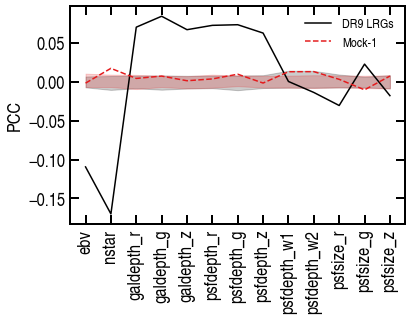

In [21]:
for pcc_i, name in zip([pcc_d, pcc_m],
                        ['DR9 LRGs', 'Mock-1']):
    ln, = plt.plot(pcc_i[0], label=name)    
    plt.fill_between(np.arange(len(maps_dr9)), *np.percentile(pcc_i[1], [0, 100], axis=0), 
                     color=ln.get_color(), alpha=0.2)
    
    
plt.xticks(ticks=np.arange(len(maps_dr9)), labels=maps_dr9, rotation=90)
plt.ylabel('PCC')
plt.legend()

array([[-0.00692415, -0.00688592, -0.00952731, -0.00685661, -0.00870658,
        -0.00777006, -0.00576101, -0.00757671, -0.00769125, -0.00808878,
        -0.00737059, -0.00828438, -0.00883837],
       [ 0.01026151,  0.00892295,  0.00866701,  0.00763129,  0.00693802,
         0.00893475,  0.00793819,  0.00744274,  0.00766981,  0.00822776,
         0.00790426,  0.00752534,  0.0081839 ]])